# Data Cleaning with Pandas 

Bu notebook'umuza başlamadan önce neler öğrendik? Temel Python bilgilerimizi tazelemek ve gerektiği zaman lineer işlemler açısından NumPy işlemleri ardından Data Analysis 101 kısmı olarak Pandas Introduction'ımızı yaptık. Şimdi ise gerek Pandas gerek NumPy'ı beraber kullanarak verileri nasıl clean edebiliriz bunları öğreneceğiz.

## Data Cleaning ne işimize yarar?

Şimdi elimizde (bugün denemek açısından küçük boyutlu olsa da) çok büyük veriler olduğunu varsayalım; bunlar 10 milyon satır da olabilir 100 bin satırda sonuçta çok fazlalar ve bunları elle öğrendiğimiz kontrolleri yapıp dataset içerisinden çıkarmayı denememizi imkansız kılacaktır.O yüzden pandas ve numPy ile birlikte verileri clean edip görselleştirme, modelleme ve train'lere hazır ve minimumum hatalı hale getirmesini sağlayacağız. Daha açıklayacı olmak gerekirse elimizde bir maaş veri seti olduğunu düşünelim. İçerisinde personelin adı, soyadı, maaşı, çalışma başlangıç tarihi, yaşı ve cinsiyeti olsun. Bizim görevimiz ise yeni bir çalışanın maaşını predict etmek olsun. 100 personel olduğunu varsayalım; fakat 10 tane çalışanın maaşı listede ***NULL*** olarak girilmiş. Bu durum bize fazladan 5 kişi, ortalamayı, std,'yi bozan 5 kişi demek. İleride cinsiyet analizi yapmamız gerekirse tamamen bozacak 5 kişi demek. Bunun önüne geçmek için bu verileri çıkartmamız gerekecektir.

### Yapmazsak ne olur?

Öncelikle yaparsak ne olur diyelim. Yaparsak eğer, ileriki modellememizi de doğru yaptığımızı farz edersek modelimiz %95+ sonuca ulaşacaktır. Bunu gönül rahatlığıyla söyleyebilirim fakat eğer bu kısımda bir hata yaparsak zincirleme hatalar söz konusu olacaktır. Her ne kadar modellememizi doğru yapacak olursakta verilerimiz karışacak, NULL veriler işin içine girecek ve ML modelimiz fail olacaktır. Her neyse çok uzatmadan başlayalım. :)

In [9]:
import numpy as np
import pandas as pd

* Step 1: Burada ilk işimiz genelde tavsiyemiz o dur ki boş verileri, boş kolonları bulmak. Bunu da pandas bize sağlayacaktır.
* ***isnull()*** metodumuz bize bunu sağlayaacktır. Şimdilik hiç verimiz olmadığından dökümantasyondan aldığımız bu yöntemle numpy "NaN" görüntüledi ve bunun boş mu? sorusunu kontrol etti.

In [10]:
pd.isnull(np.nan)

True

In [11]:
pd.isnull(None)

True

* Step 2:Şimdi ise "NaN mı?" kontrolü yapma zamanı.

In [12]:
pd.isna(np.nan)

True

In [13]:
pd.isna(None)

True

* Step 3: Evet muhtemelen biraz anlamadınız çünkügerçek değerler yok elimizde hemen uyarlayalım bi' şeyler.
* Evet pandas'tan hatırlayacağımız üzere ufak bir tablo oluşturduk ve içerisine bazı değerleri ***NaN*** olarak göndedik
* Ardından ***isnull()*** fonksiyonuyla birlikte boolean olan boş hücreleri görüntüledik.
* Boş olmayan hücreleri ise ***notnull()*** fonksiyonuyla görüntüleyebildik.

In [14]:
data = pd.DataFrame({
    'X Column': [1821, 252, np.nan, 1, np.nan],
    'Y Column': [999, 2512, 221, 2, 4],
    'Z Column': [np.nan, np.nan, np.nan, np.nan, 999]
})

In [15]:
data.isnull()

,X Column,Y Column,Z Column
0,False,False,True
1,False,False,True
2,True,False,True
3,False,False,True
4,True,False,False


In [16]:
data.notnull()

,X Column,Y Column,Z Column
0,True,True,False
1,True,True,False
2,False,True,False
3,True,True,False
4,False,True,True


* Step4: Şimdi ise biraz bu eksik veriler üzerinde detay vermeden nasıl işlem yapabiliriz ona bakalım.
* data verimizin içindeki ***notnull()*** vee ***isnull()*** verileri gösterdik.

In [18]:
data

,X Column,Y Column,Z Column
0,1821.0,999,NaN
1,252.0,2512,NaN
2,NaN,221,NaN
3,1.0,2,NaN
4,NaN,4,999.0


In [19]:
data.notnull()

,X Column,Y Column,Z Column
0,True,True,False
1,True,True,False
2,False,True,False
3,True,True,False
4,False,True,True


In [20]:
data[data.notnull()]

,X Column,Y Column,Z Column
0,1821.0,999,NaN
1,252.0,2512,NaN
2,NaN,221,NaN
3,1.0,2,NaN
4,NaN,4,999.0


In [21]:
data[data.isnull()]

,X Column,Y Column,Z Column
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [22]:
data[data.notnull()]

,X Column,Y Column,Z Column
0,1821.0,999,NaN
1,252.0,2512,NaN
2,NaN,221,NaN
3,1.0,2,NaN
4,NaN,4,999.0


In [23]:
data.isnull()

,X Column,Y Column,Z Column
0,False,False,True
1,False,False,True
2,True,False,True
3,False,False,True
4,True,False,False


In [24]:
data.isnull().sum()

X Column    2
Y Column    0
Z Column    4
dtype: int64

# Section 2: Dropping Missing Values / Hatalı Verileri Çıkartmak

* Step1:Dropna() fonksiyonu bildiğimiz üzere drop edebileceğimiz column'ları bize göstermektedir. Aşağıda gördüğünüz üzere bunlar. Şimdi biz 2,3,6 ve 8 numaralı index'leri drop edeceğimizi biliyoruz ama nasıl? Önce tekrar verimizi kontrol edip, ardından ***dropna()*** ile bu işlemi gerçekleştirelim.
* Ardından basic pandas ile inceledik verimizi adettendir.
* ***dropna()*** fonksyionunun içine thresh metoduna tanımlama yaparsak ve axis'ine ***columns*** dersek 3. kolonu kaldırmasını iletmiş oluruz.

In [25]:
data

,X Column,Y Column,Z Column
0,1821.0,999,NaN
1,252.0,2512,NaN
2,NaN,221,NaN
3,1.0,2,NaN
4,NaN,4,999.0


In [32]:
data.dropna(axis=1)

,Y Column
0,999
1,2512
2,221
3,2
4,4


In [34]:
data.shape

(5, 3)

In [ ]:
data.info()

In [38]:
data.dropna(thresh=3, axis='columns')

,X Column,Y Column
0,1821.0,999
1,252.0,2512
2,NaN,221
3,1.0,2
4,NaN,4


## Filling null values / sıfır ile boş hücreleri doldurmak

* Step2:  Büyük ve önemli verisetleri incelerken bizim komple hücreyi kaldırmaktan ziyade sık kullandığımız bir method olan sıfırla doldurma yöntemi olan ***fillna()*** fonksiyonunu kullandık. BUrada ***NaN*** yani boş verileri sıfır ile doldurarak aslında işlemlerde ve analizlerde etkisiz eleman haline getirdik. İlk baştaki personel örneğimizde olduğu gibi personelin sırf maaşı yazmıyor diye komple hücreyi kaldırmaktansa maaş'ı sıfır alıp ilerideki cinsiyet analizinde değerini kullanabileceğiz yani etkin rol almaya devam edecek.

* Vakti zamanına göre kullanabileceğimiz çok önemli bir diğer method ise ***fillna()*** metoodunun içerisine geri kalan verilerimizin ortalamasına göre doldurmasıdır. Örneğin Z kolonunda sadece 1 değer vardı 999 bunun hepsini 999 olarak doldurdu, istatistik bilimi açısından kesinlikle şuan yanlış bir durum göstermekte. Her zaman kullanmak doğru olmayacaktır.

* ***mean()*** olarak yazıp fonksiyonun içerisini karmaşıklaştırmaktansa method olarak ***ffill*** ve ***bfill*** metodlarını kullanabiliriz. ffill bize aynı bir önceki hücrede tanımlı değeri alıp verimizin o halde kalmasını kalmasını bfill ise mean yani ortalamaya göre aynı hesaplamayla doldurmamızı sağlayacaktır.

In [40]:
data.fillna(0)

,X Column,Y Column,Z Column
0,1821.0,999,0.0
1,252.0,2512,0.0
2,0.0,221,0.0
3,1.0,2,0.0
4,0.0,4,999.0


In [41]:
data.fillna(data.mean())

,X Column,Y Column,Z Column
0,1821.000000,999,999.0
1,252.000000,2512,999.0
2,691.333333,221,999.0
3,1.000000,2,999.0
4,691.333333,4,999.0


In [42]:
data

,X Column,Y Column,Z Column
0,1821.0,999,NaN
1,252.0,2512,NaN
2,NaN,221,NaN
3,1.0,2,NaN
4,NaN,4,999.0


In [45]:
data.fillna(method='ffill')

,X Column,Y Column,Z Column
0,1821.0,999,NaN
1,252.0,2512,NaN
2,252.0,221,NaN
3,1.0,2,NaN
4,1.0,4,999.0


In [44]:
data.fillna(method='bfill')

,X Column,Y Column,Z Column
0,1821.0,999,999.0
1,252.0,2512,999.0
2,1.0,221,999.0
3,1.0,2,999.0
4,NaN,4,999.0


# Listing for Uniqe Values

* Step1: Yine ufak bir veriseti oluşturduk hemen kendimize
* Şimdi ise içerisinde unique yani eşşsiz değerlere göre sıralama yapacağız. Şimdi şöyle düşünelim elimizdeki verinin 100.000 hücreli olduğunu ve yalnızca 'Student', 'Engineer' ve 'Doctor' İşlerini incelediğini varsayalım. Ne oldu bu durumda yalnızca 3 adet result var bizim predict edeceğimiz 3 adet çıktı var bunlara Unique yani eşşsiz değer diyebiliriz. Aynı şekilde Cİnsiyet'e de yalnızca 2 seçeneğimiz olduğu için onların içerisinde değişiklikler yapabiliriz. Örneğin veriyi işlemesi kolay olması açısından 'Male' feature'ına 0, 'Female' feature'ına 1 değerini verebiliriz. Deneyelim hemen.

* Bu session için en karmaşık size şuan saçma gelecek fakat ielride çok mantıklı olduğunu fark edeceğiniz son bir şeye değineceğim. Örneğin 'Age' feature'ında 216 diye bir değer var, imkansız değil mi? Bu bizim verimizi bozar mı elbette kayıplara uğratır o yüzden bunu biraz daha uyarlayabiliriz. Nasıl female ve Male gibi olduğu gibi burada da mantıksal operatörlerle yapabileceğiz.

In [54]:
data_sec = pd.DataFrame({
    'Sex':['Male', 'Male', 'Female', 'Female', 'Female'],
    'Age': [12, 17, 18, 23, 28],
    'Jobs': ['Student', 'Student', 'Student', 'Engineer', 'Doctor']
})

In [55]:
data_sec

,Sex,Age,Jobs
0,Male,12,Student
1,Male,17,Student
2,Female,18,Student
3,Female,23,Engineer
4,Female,28,Doctor


In [56]:
data_sec['Sex'].unique()

array(['Male', 'Female'], dtype=object)

In [60]:
data_sec['Sex'].value_counts()

Female    3
Male      2
Name: Sex, dtype: int64

In [65]:
data_sec['Sex'].replace({
    'Male': 0,
    'Female': 1
})

0    0
1    0
2    1
3    1
4    1
Name: Sex, dtype: int64

In [69]:
data_sec[data_sec['Age']>100]

,Sex,Age,Jobs


In [70]:
data_sec.loc[data_sec['Age'] > 100, 'Age'] = data_sec.loc[data_sec['Age'] > 100, 'Age'] / 10

* Step2: Şİmdiki incelememiz için ülkeler ve başkentleri şeklinde ufak bir set hazırlayalım.

* Evet bunun adı ***duplicated()*** yani birden fazla kez aynı değeri alan hücreleri boolean olarak bize geri döndüren yöntem. Varsayılan olarak ***keep=first*** metodunu almaktadır. Bunun anlamı ise ilk gördüğü duplicated olmuş hücreyi bize geri döndür demek. biz ise hem first hem last yaptık ilk aşamada.

* Sıradaki metod ise ***subset()*** metodu, burada ise yalnızca belirli kolonları dikkate almak istersek, örneğin bir spor dataset'i inceliyoruz ve bir çok Forvet hücresi var fakat burası da doğru. Başka yerleri kontrol etmek istersek subset() kullanmamız gerekecektir. Önemlidir.

In [138]:
capitals = pd.Series([
    'Ankara',
    'Paris',
    'London',
    'Baku',
    'Roma',
    'Varşova',
    'Varşova',
], index = [
    'Turkey',
    'France',
    'England',
    'Azerbaijan',
    'Italy',
    'Crotia',
    'Polland',
])

In [139]:
capitals

Turkey         Ankara
France          Paris
England        London
Azerbaijan       Baku
Italy            Roma
Crotia        Varşova
Polland       Varşova
dtype: object

In [140]:
capitals.duplicated()

Turkey        False
France        False
England       False
Azerbaijan    False
Italy         False
Crotia        False
Polland        True
dtype: bool

In [141]:
capitals.duplicated(keep='first')

Turkey        False
France        False
England       False
Azerbaijan    False
Italy         False
Crotia        False
Polland        True
dtype: bool

In [142]:
capitals.duplicated(keep='last')

Turkey        False
France        False
England       False
Azerbaijan    False
Italy         False
Crotia         True
Polland       False
dtype: bool

In [143]:
new_capitals = pd.DataFrame({
    'City': [
        'Ankara',
        'Paris',
        'London',
        'Baku',
        'Roma',
        'Varşova',
        'Varşova',
    ], 
    'Country' : [
        'Turkey',
        'France',
        'England',
        'Azerbaijan',
        'Italy',
        'Italy',
        'Italy',
    ]
})

In [144]:
new_capitals

,City,Country
0,Ankara,Turkey
1,Paris,France
2,London,England
3,Baku,Azerbaijan
4,Roma,Italy
5,Varşova,Italy
6,Varşova,Italy


In [145]:
new_capitals.duplicated(subset=['City'], keep='last')

0    False
1    False
2    False
3    False
4    False
5     True
6    False
dtype: bool

# Splitting

* Step1: Şimdi ise splitler bir nevi düzenli ifadeler (regex) çalışmanınızı tavsiye ettirecek bir konu çok hafif üstünden geçeceğiz.
* Aşağıdaki gibi makinemiz açısından fazlasıyla anlamsız veriler gelebilir fakat bu veriler önemli de olabilir, bizim bunları düzenlemeiz gerekecektir değil mi? Hadi split edelim onları.
* Mantıken ilk kısm doğum yılı, ay ve gün şeklinde gelmiş verilerimiz; biz bunları 3 ayrı kolon şekline ayırabilirz diye düşünüyorum ve uyguluyoruz.
* Biraz regex bilgimizi tazelemekte fayda var :) Bende bol kopyayla hallettim :) 

https://pythex.org/ Burası sizlere de yardımcı olacaktır.

In [176]:
birth_date = pd.DataFrame({
    'Birt':[
        '1996_OCT_12',
        '1992?_ SEP_11',
        '1977_MAY_14',
        '1998_ ?SEP_11',
    ]
})

In [177]:
birth_date

,Birt
0,1996_OCT_12
1,1992?_ SEP_11
2,1977_MAY_14
3,1998_ ?SEP_11


In [178]:
birth_date['Birt'].str.split('_')

0      [1996, OCT, 12]
1    [1992?,  SEP, 11]
2      [1977, MAY, 14]
3    [1998,  ?SEP, 11]
Name: Birt, dtype: object

In [181]:
birth_date = birth_date['Birt'].str.split('_', expand=True)

In [183]:
birth_date

,0,1,2
0,1996,OCT,12
1,1992?,SEP,11
2,1977,MAY,14
3,1998,?SEP,11


In [184]:
birth_date.columns = ['Year', 'Month', 'Day']

In [185]:
birth_date

,Year,Month,Day
0,1996,OCT,12
1,1992?,SEP,11
2,1977,MAY,14
3,1998,?SEP,11


In [190]:
birth_date['Year'].str.contains('\?')

0    False
1     True
2    False
3    False
Name: Year, dtype: bool

In [191]:
birth_date['Month'].str.contains('\?')

0    False
1    False
2    False
3     True
Name: Month, dtype: bool

In [193]:
birth_date['Year'].str.strip()

0     1996
1    1992?
2     1977
3     1998
Name: Year, dtype: object

In [194]:
birth_date['Year'].str.replace(r'(?P<year>\d{4})\?', lambda n: n.group('year'))

0    1996
1    1992
2    1977
3    1998
Name: Year, dtype: object

# Visualization v2 / Görselleştirme

In [195]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

* Step1: İşleri karıştıralım biraz.

In [196]:
data = np.arange(0, 100)

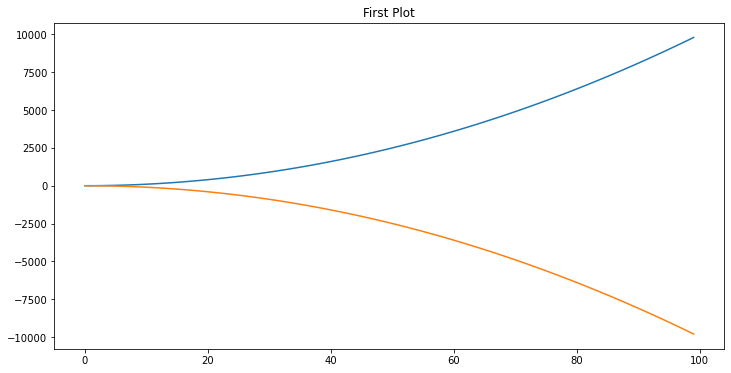

In [210]:
plt.figure(figsize=(12,6))
plt.title('First Plot')

plt.plot(data, data**2)
plt.plot(data, -1 * (data**2))

* Step2: Ne yaptık? Önce plot'umuzu oluşturduk, ismini verdik. Ardından içerisine 0'dan 100'e kadar olarak doldurudğumuz değerlerin herbirinin karesini alarak gönderdik plot'umuza. Altında bir plot daha çizdirdik her bir değerin aynısının negatifini alarak tekrar bunu yaptırdık. Güzel bir yansıma elde ettik.

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d16a45e20>,
       dtype=object))

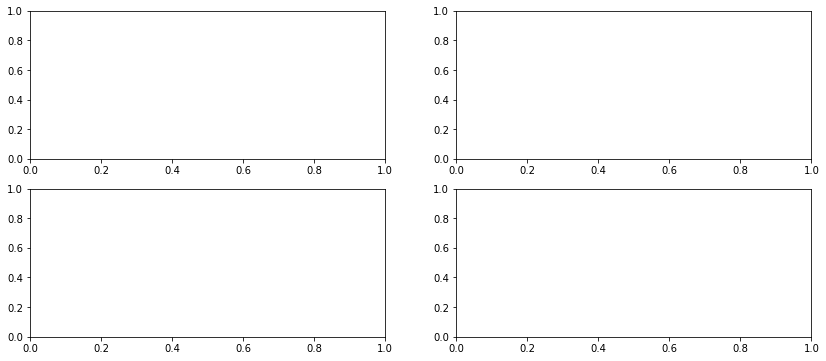

In [216]:
data_plot = plt.subplots(nrows=2, ncols=2, figsize=(14,6))

fig, ((ax1, ax2), (ax3, ax4)) = data_plot

data_plot

* Step3:4 adet subplot oluşturduk ve bunlara row col değerleri tanımladık default olarak. Şimdi ise içlerini rasgele dolduralım bakalım neler çıkacak.

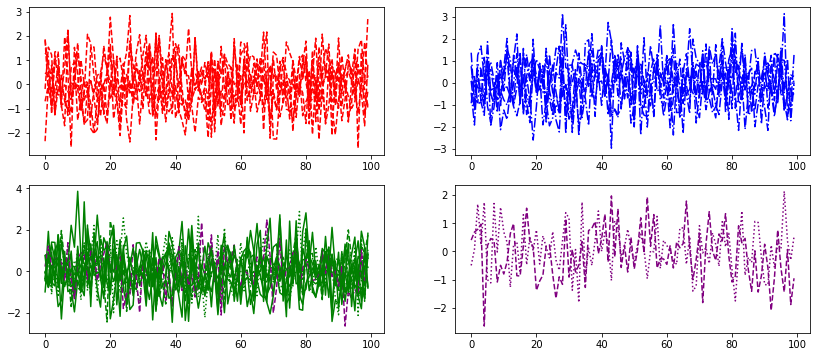

In [223]:
ax1.plot(np.random.randn(100), c='red', linestyle='dashed')
ax2.plot(np.random.randn(100), c='blue', linestyle='dashdot')
ax3.plot(np.random.randn(100), c='green', linestyle='solid' )
ax4.plot(np.random.randn(100), c='purple', linestyle='dotted' )

fig